5) MiniBatch

batch : 전체 데이터를 한꺼번에 학습시키는 방법

mini batch : 전체 데이터를 mini batch 단위로 나누어서 학습시키는 방법

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [2]:
from sklearn.cluster import KMeans
#기본모형
model1 = KMeans(n_clusters=3).fit(X)

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [3]:
#미니배치를 적용한 모형
#데이터를 미니배치 크기만큼 무작위로 분리하여 처리
from sklearn.cluster import MiniBatchKMeans
model2 = MiniBatchKMeans(n_clusters=3, batch_size=1536).fit(X)

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [4]:
from sklearn.metrics.cluster import silhouette_score  
silhouette_score(X[:10000], model1.predict(X[:10000]))

0.6487423324551153

In [5]:
from sklearn.metrics.cluster import silhouette_score  
silhouette_score(X[:10000], model2.predict(X[:10000]))

0.6484649926802576

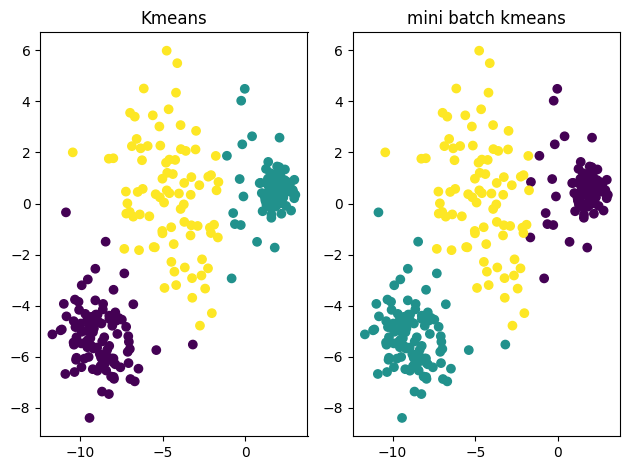

In [6]:
import matplotlib.pyplot as plt
import numpy as np
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("Kmeans")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("mini batch kmeans")
plt.tight_layout()
plt.show()
#결과는 큰 차이가 없음